# 1. Importing necessary libraries

In [8]:
#basic libraries

import numpy as np
import pandas as pd

#visualization libraries
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Read the dataset

- Loading dataset from csv file

In [87]:
df = pd.read_csv("./heart_disease_uci.csv", index_col = 'id')

- See the rows of the dataset to get an overview of the data structure

# 3. Find out the Data Types and Column Types

In [15]:
df.head()

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
id,,,,,,,,,,,,,,,
1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


- See the dataset column null values and column types of the dataset

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 920 entries, 1 to 920
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    int64  
 1   sex       920 non-null    object 
 2   dataset   920 non-null    object 
 3   cp        920 non-null    object 
 4   trestbps  861 non-null    float64
 5   chol      890 non-null    float64
 6   fbs       830 non-null    object 
 7   restecg   918 non-null    object 
 8   thalch    865 non-null    float64
 9   exang     865 non-null    object 
 10  oldpeak   858 non-null    float64
 11  slope     611 non-null    object 
 12  ca        309 non-null    float64
 13  thal      434 non-null    object 
 14  num       920 non-null    int64  
dtypes: float64(5), int64(2), object(8)
memory usage: 115.0+ KB


- See how many null there are in the dataset before starting the data analysis

In [27]:
df.isnull().sum()

age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

- See the value types of each column to analyze the dataset features

In [29]:
list_col = df.columns
values_col = []
for colIndex, col in enumerate(list_col): 
    if (len(df[col].unique()) > 10): values_col = '{} {}'.format(len(df[col].unique()), 'values')
    else: values_col = df[col].unique()
    print('{}. {}: {}'.format(colIndex + 1, col, values_col))

1. age: 50 values
2. sex: ['Male' 'Female']
3. dataset: ['Cleveland' 'Hungary' 'Switzerland' 'VA Long Beach']
4. cp: ['typical angina' 'asymptomatic' 'non-anginal' 'atypical angina']
5. trestbps: 62 values
6. chol: 218 values
7. fbs: [True False 'NA']
8. restecg: ['lv hypertrophy' 'normal' 'st-t abnormality' nan]
9. thalch: 120 values
10. exang: [False True nan]
11. oldpeak: 54 values
12. slope: ['downsloping' 'flat' 'upsloping' nan]
13. ca: [ 0.  3.  2.  1. nan]
14. thal: ['fixed defect' 'normal' 'reversable defect' nan]
15. num: [0 2 1 3 4]


In [23]:
df['age'].value_counts()

age
54    51
58    43
55    41
56    38
57    38
52    36
62    35
51    35
59    35
53    33
60    32
61    31
48    31
63    30
50    25
41    24
46    24
43    24
64    22
49    22
65    21
44    19
47    19
45    18
42    18
38    16
67    15
39    15
69    13
40    13
66    13
35    11
37    11
68    10
34     7
70     7
74     7
36     6
32     5
71     5
72     4
29     3
75     3
31     2
33     2
76     2
77     2
30     1
28     1
73     1
Name: count, dtype: int64

In [19]:
df['trestbps'].value_counts()

trestbps
120.0    131
130.0    115
140.0    102
110.0     59
150.0     56
        ... 
164.0      1
101.0      1
174.0      1
192.0      1
127.0      1
Name: count, Length: 61, dtype: int64

In [20]:
df['chol'].value_counts()

chol
0.0      172
220.0     10
254.0     10
223.0      9
230.0      9
        ... 
360.0      1
412.0      1
358.0      1
321.0      1
385.0      1
Name: count, Length: 217, dtype: int64

In [21]:
df['thalch'].value_counts()

thalch
150.0    43
140.0    41
120.0    35
130.0    30
160.0    26
         ..
195.0     1
91.0      1
87.0      1
192.0     1
73.0      1
Name: count, Length: 119, dtype: int64

In [22]:
df['oldpeak'].value_counts()

oldpeak
 0.0    370
 1.0     83
 2.0     76
 1.5     48
 3.0     28
 0.5     19
 1.2     17
 2.5     16
 1.4     15
 0.8     15
 1.6     14
 0.2     14
 0.6     14
 1.8     12
 0.4     10
 0.1      9
 4.0      8
 2.6      7
 2.8      7
 1.3      5
 2.2      5
 0.7      5
 1.9      5
 0.3      5
 3.6      4
 2.4      4
 1.1      4
 0.9      4
 3.4      3
 1.7      2
-1.0      2
 4.2      2
 2.3      2
 2.1      2
-0.5      2
 3.2      2
 3.5      2
-0.8      1
-0.1      1
-0.9      1
-2.0      1
-0.7      1
-2.6      1
 6.2      1
-1.5      1
-1.1      1
 5.0      1
 4.4      1
 3.8      1
 2.9      1
 5.6      1
 3.1      1
 3.7      1
Name: count, dtype: int64

# 4. Data Cleaning

In [88]:
df['fbs'] = df['fbs'].fillna('NA')
df = df.drop(df[df['fbs'] == 'NA'].index)

In [89]:
df['restecg'] = df['restecg'].fillna('NA')
df = df.drop(df[df['restecg'] == 'NA'].index)

In [90]:
df['exang'] = df['exang'].fillna('NA')
df = df.drop(df[df['exang'] == 'NA'].index)

In [91]:
df['slope'] = df['slope'].fillna('NA')
df = df.drop(df[df['slope'] == 'NA'].index)

In [92]:
df['ca'] = df['ca'].fillna('NA')
df = df.drop(df[df['ca'] == 'NA'].index)

In [93]:
df['thal'] = df['thal'].fillna('NA')
df = df.drop(df[df['thal'] == 'NA'].index)

In [94]:
df['thal'].replace(['reversable defect'], 'reversible defect', inplace = True)

In [95]:
# Summary Statistics for Numerical data:
df.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000
mean,54.521739,131.715719,246.785953,149.327759,1.058528,0.946488
std,9.030264,17.747751,52.532582,23.121062,1.162769,1.230409
min,29.000000,94.000000,100.000000,71.000000,0.000000,0.000000
25%,48.000000,120.000000,211.000000,132.500000,0.000000,0.000000
50%,56.000000,130.000000,242.000000,152.000000,0.800000,0.000000
75%,61.000000,140.000000,275.500000,165.500000,1.600000,2.000000
max,77.000000,200.000000,564.000000,202.000000,6.200000,4.000000


In [45]:
# Summary Statistics for Categorical data:
df.describe(exclude=[np.number])

,sex,dataset,cp,fbs,restecg,exang,slope,ca,thal
count,299,299,299,299,299,299,299,299.0,299
unique,2,3,4,2,3,2,3,4.0,3
top,Male,Cleveland,asymptomatic,False,normal,False,flat,0.0,normal
freq,203,297,144,256,149,200,139,176.0,164


In [46]:
df.isnull().sum() 

age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

## Outliers

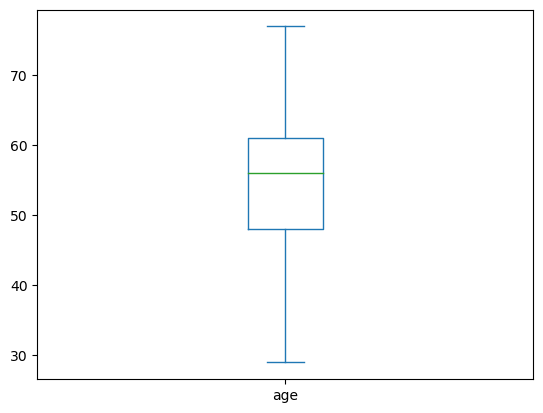

In [96]:
df['age'].plot(kind='box')
plt.show()

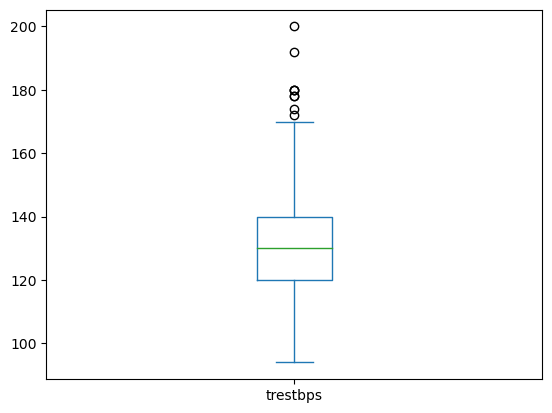

In [97]:
df['trestbps'].plot(kind='box')
plt.show()

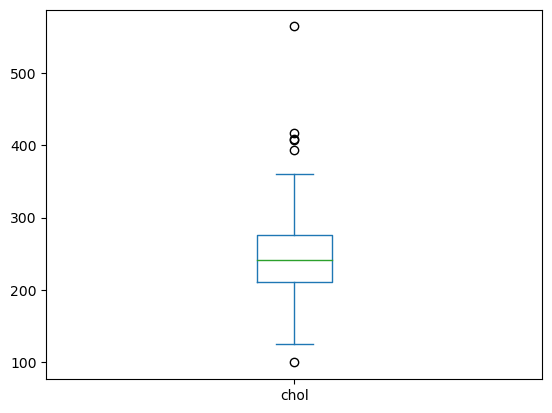

In [98]:
df['chol'].plot(kind='box')
plt.show()

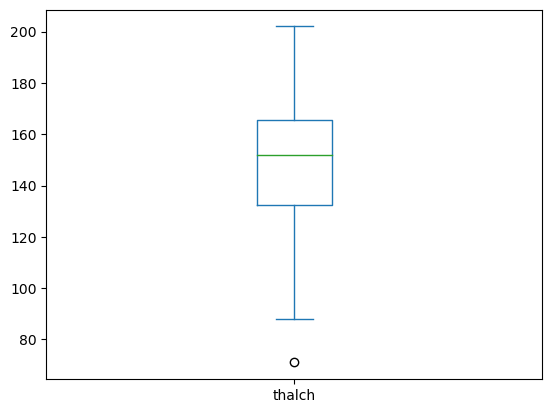

In [99]:
df['thalch'].plot(kind='box')
plt.show()

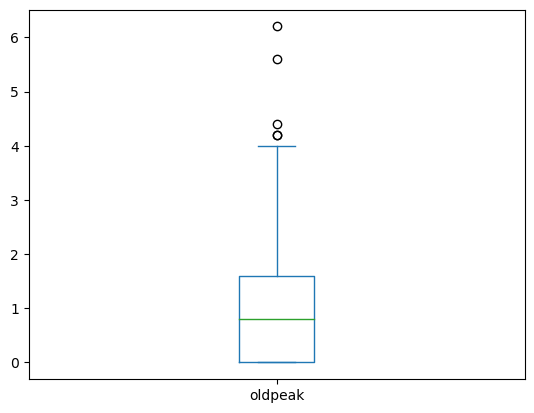

In [100]:
df['oldpeak'].plot(kind='box')
plt.show()

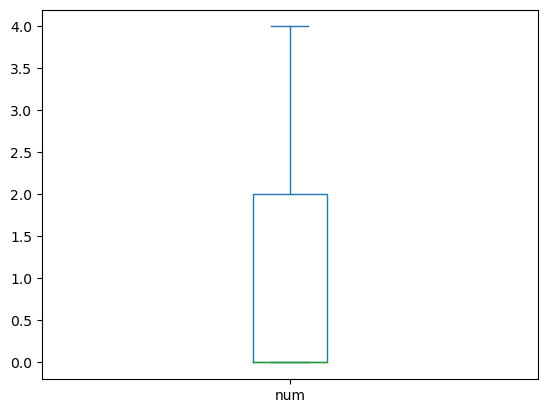

In [101]:
df['num'].plot(kind='box')
plt.show()

# 5. Distributions and Relationships

# 6. data Anslysis and Visualization

In [103]:
from sklearn.preprocessing import LabelEncoder
object_cols = ['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
label_encoder = LabelEncoder()
for col in object_cols:
    label_encoder.fit(df[col])
    df[col] = label_encoder.transform(df[col])

<Axes: >

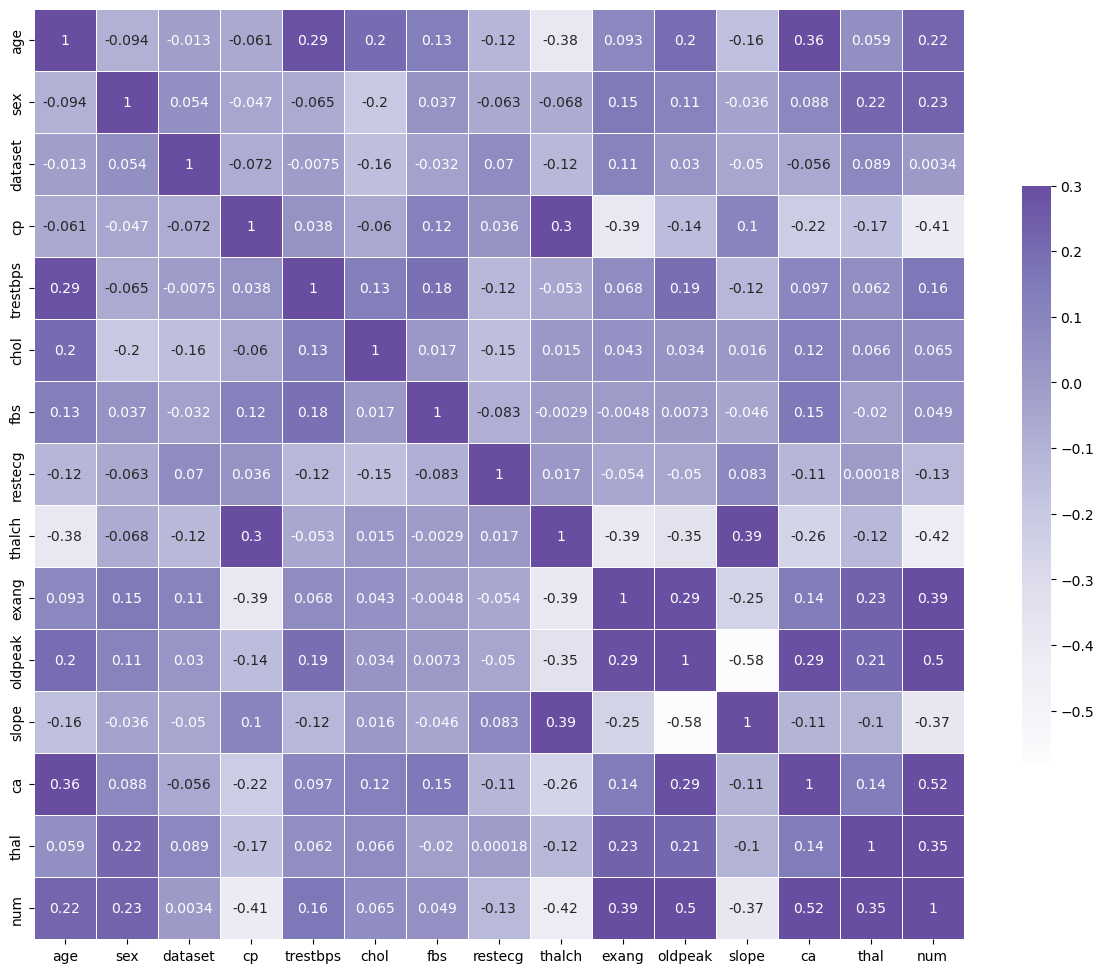

In [104]:
# Compute the correlation matrix
corr = df.corr()

f, ax = plt.subplots(figsize=(15, 15))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap='Purples', vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot = True)

C:\Users\300392979\AppData\Local\Temp\ipykernel_14128\3980166100.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'], ax=axes[0,0])
C:\Users\300392979\AppData\Local\Temp\ipykernel_14128\3980166100.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['sex'], ax=axes[0,1])
C:\Users\300

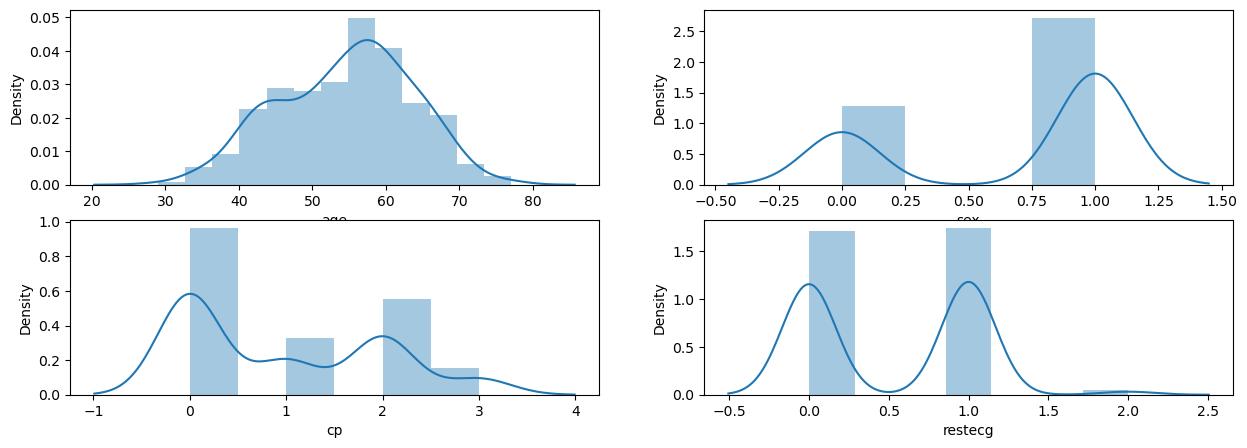

In [107]:
fig, axes = plt.subplots(2,2, figsize=(15,5))

sns.distplot(df['age'], ax=axes[0,0])
sns.distplot(df['sex'], ax=axes[0,1])
sns.distplot(df['cp'], ax=axes[1,0])
sns.distplot(df['restecg'], ax=axes[1,1])


plt.show()

C:\Users\300392979\AppData\Local\Temp\ipykernel_14128\3469822856.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['ca'], ax=axes[0,0])


KeyError: 'slop'

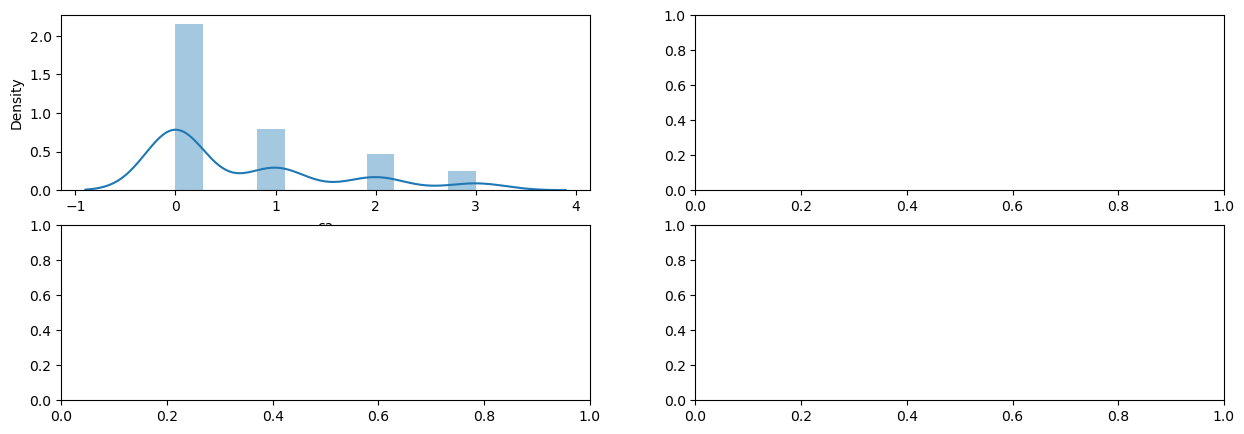

In [108]:
# Categorical variable distributions

fig, axes = plt.subplots(2,2, figsize=(15,5))

sns.distplot(df['ca'], ax=axes[0,0])
sns.distplot(df['slop'], ax=axes[0,1])
sns.distplot(df['fbs'], ax=axes[1,0])
sns.distplot(df['restecg'], ax=axes[1,1])


plt.show()

# Part 2

1) I would choose linear regression because the model prediction depend of multiple features data 
2) x = m*b
3) the dependent variable is m it is the slope, the b is the linear value and x is the value of x axis